In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import scipy as sc
import statsmodels.api as sm
import scipy.stats as stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy as cp
import pygrib
import cfgrib
import glob
import stormeunice as eun

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)

# Import data

In [23]:
lon_min = -15
lon_max = 5
lat_min = 45
lat_max = 60

In [24]:
euroatlantic = [lon_min-13, lon_max, lat_min-5, lat_max+6]
uk = [-11, 5, 48, 60]

In [9]:
# IFS data
inidate = '2022-02-14'
experiments = ['pi', 'curr', 'incr']
eps500 = eun.data.Data.get_eps_pl_data(experiments, level = 500, inidate = inidate)

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/pl/cf/b2nn_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/pl/pf/b2nn_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/pl/cf/1_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/pl/pf/1_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/pl/cf/b2no_2022-02-14.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/pl/pf/b2no_2022-02-14.nc


In [30]:
# ERA 5 data
era5_2022 = xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/ERA5/EU025/pl/2022.nc')

# 500hPa

Text(0.5, 1.0, 'ERA5, Feb18, 12UTC')

/home/e/ermis/nobackups/miniconda3/envs/storm_eunice39/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


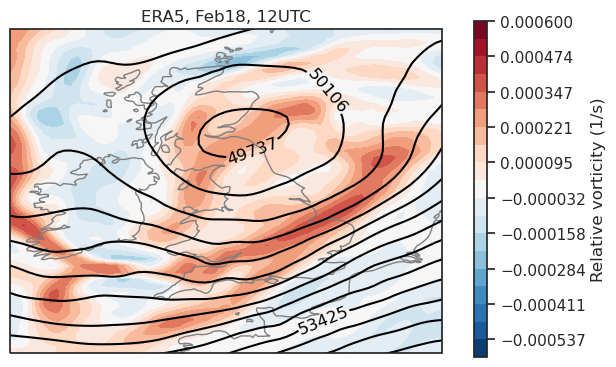

In [57]:
projection = ccrs.PlateCarree()

gph_min = 49000
gph_max = 54900

vo_min = -0.0006
vo_max = 0.0006

longitude = era5_2022.longitude.values
latitude = era5_2022.latitude.values

vo_vals = era5_2022.sel(time='2022-02-18 12',
                        level=500).vo
gph_vals = era5_2022.sel(time='2022-02-18 12',
                         level=500).z

# figure and map setup
fig = plt.figure(1)
ax = plt.subplot(1, 1, 1, projection=projection)
ax.set_extent(uk, projection)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color='grey')

# vo as shading
clevs_vo = np.linspace(vo_min, vo_max, 20)
cf = ax.contourf(longitude, latitude, vo_vals, clevs_vo, cmap=plt.cm.RdBu_r,
                transform=projection)

#gph as contours
clevs_gph = np.linspace(gph_min, gph_max, 17)
cs = ax.contour(longitude, latitude, gph_vals, clevs_gph, colors='black',
                transform=projection)
plt.clabel(cs, fmt='%d')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(cf, cax=cbar_ax, label='Relative vorticity (1/s)')

ax.set_title("ERA5, Feb18, 12UTC")

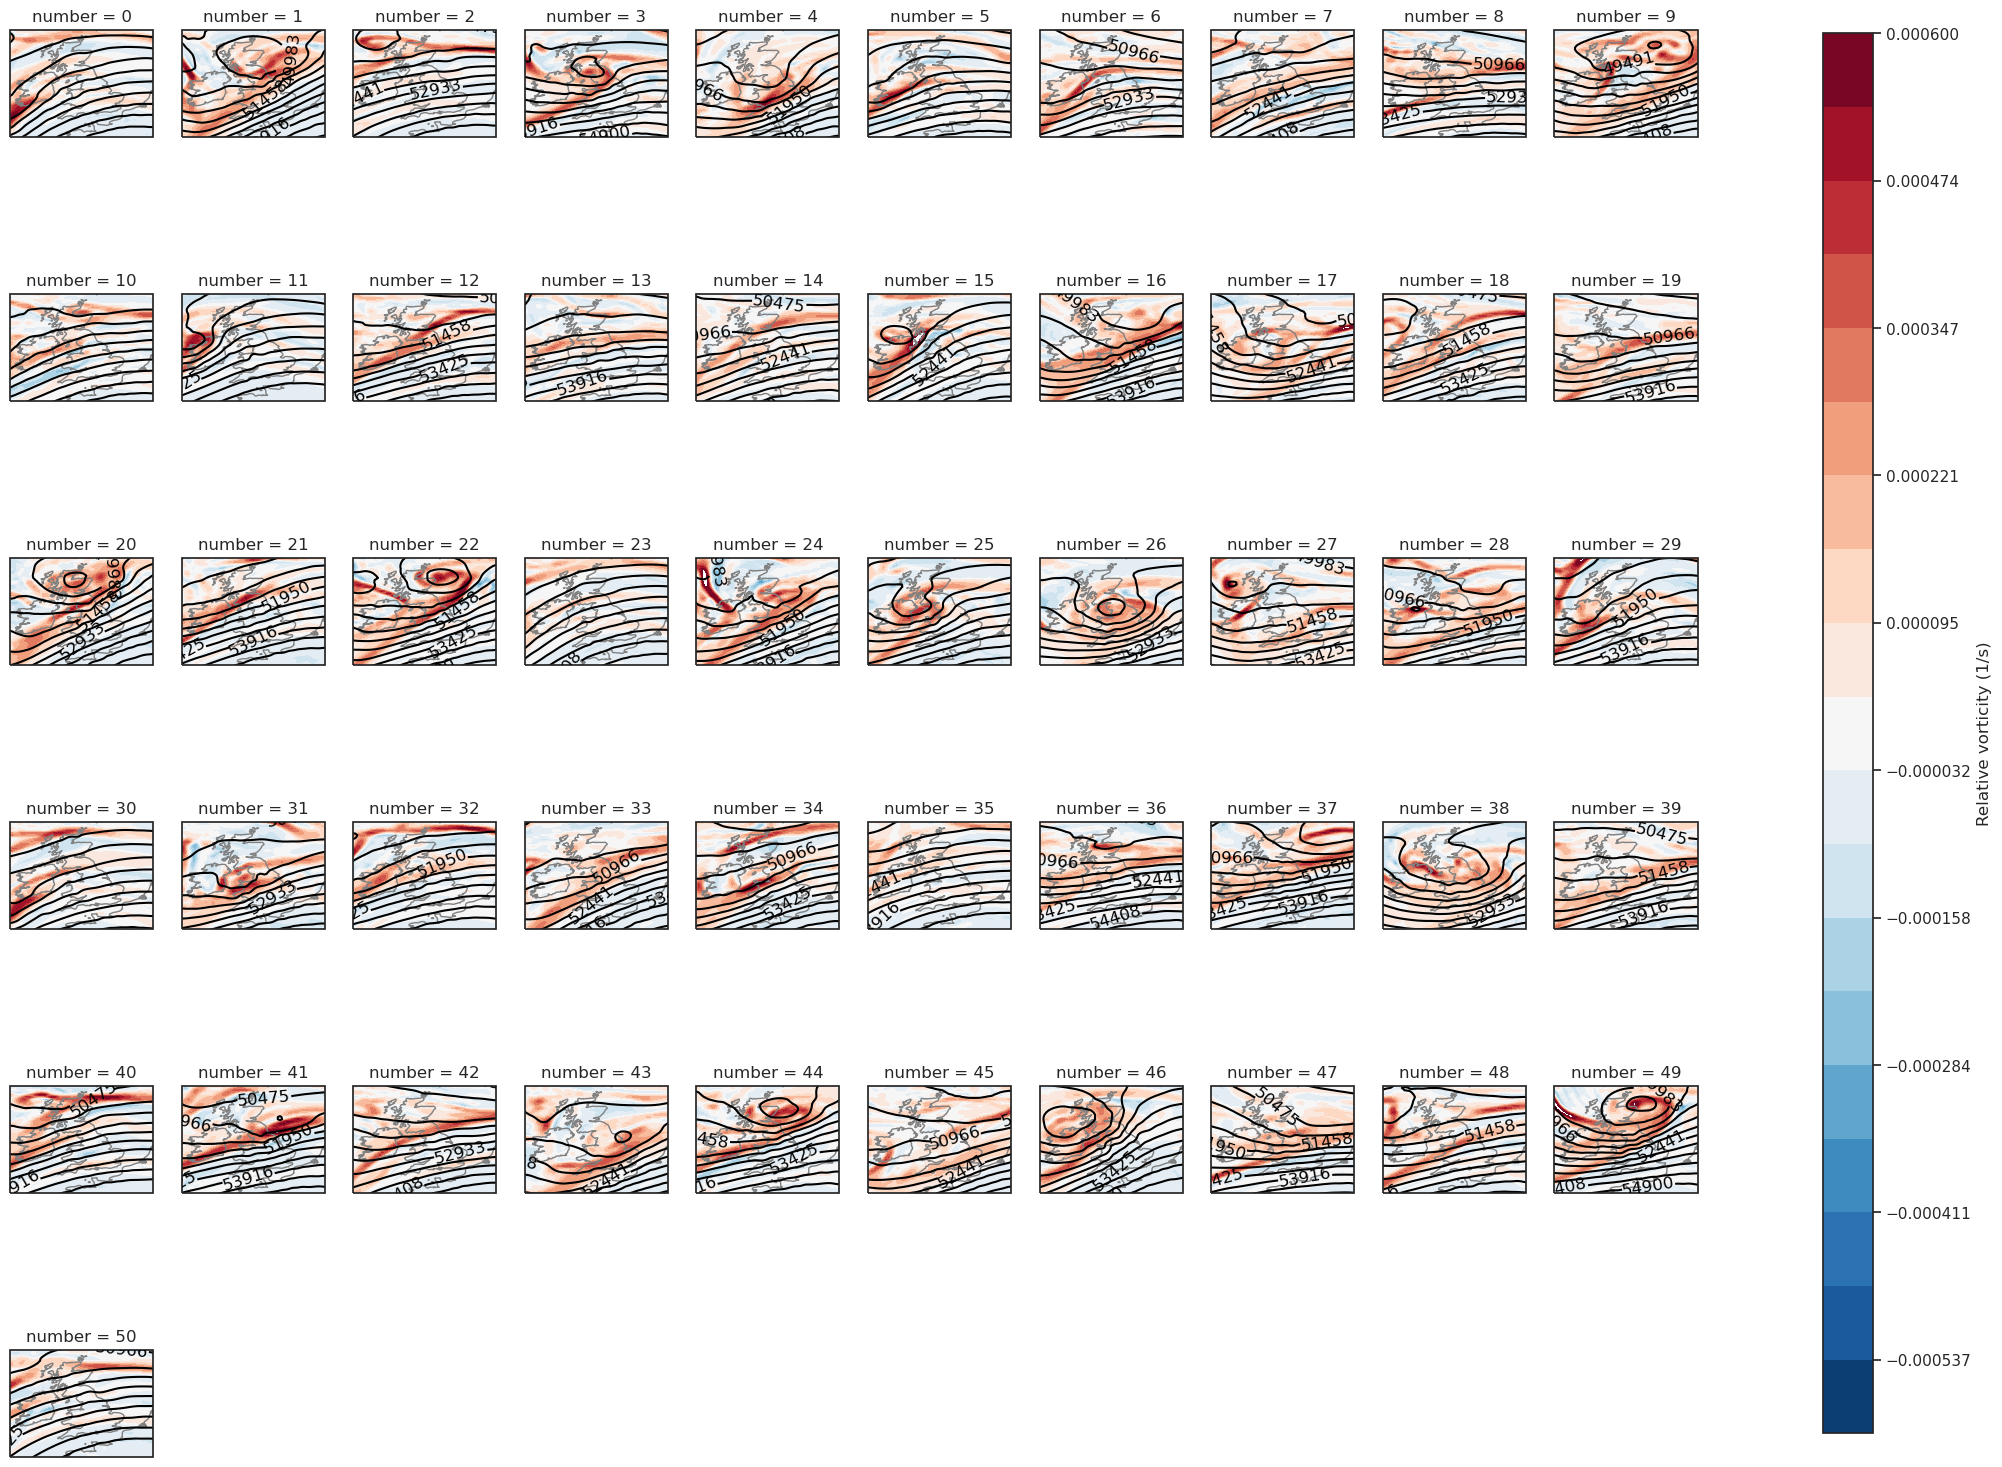

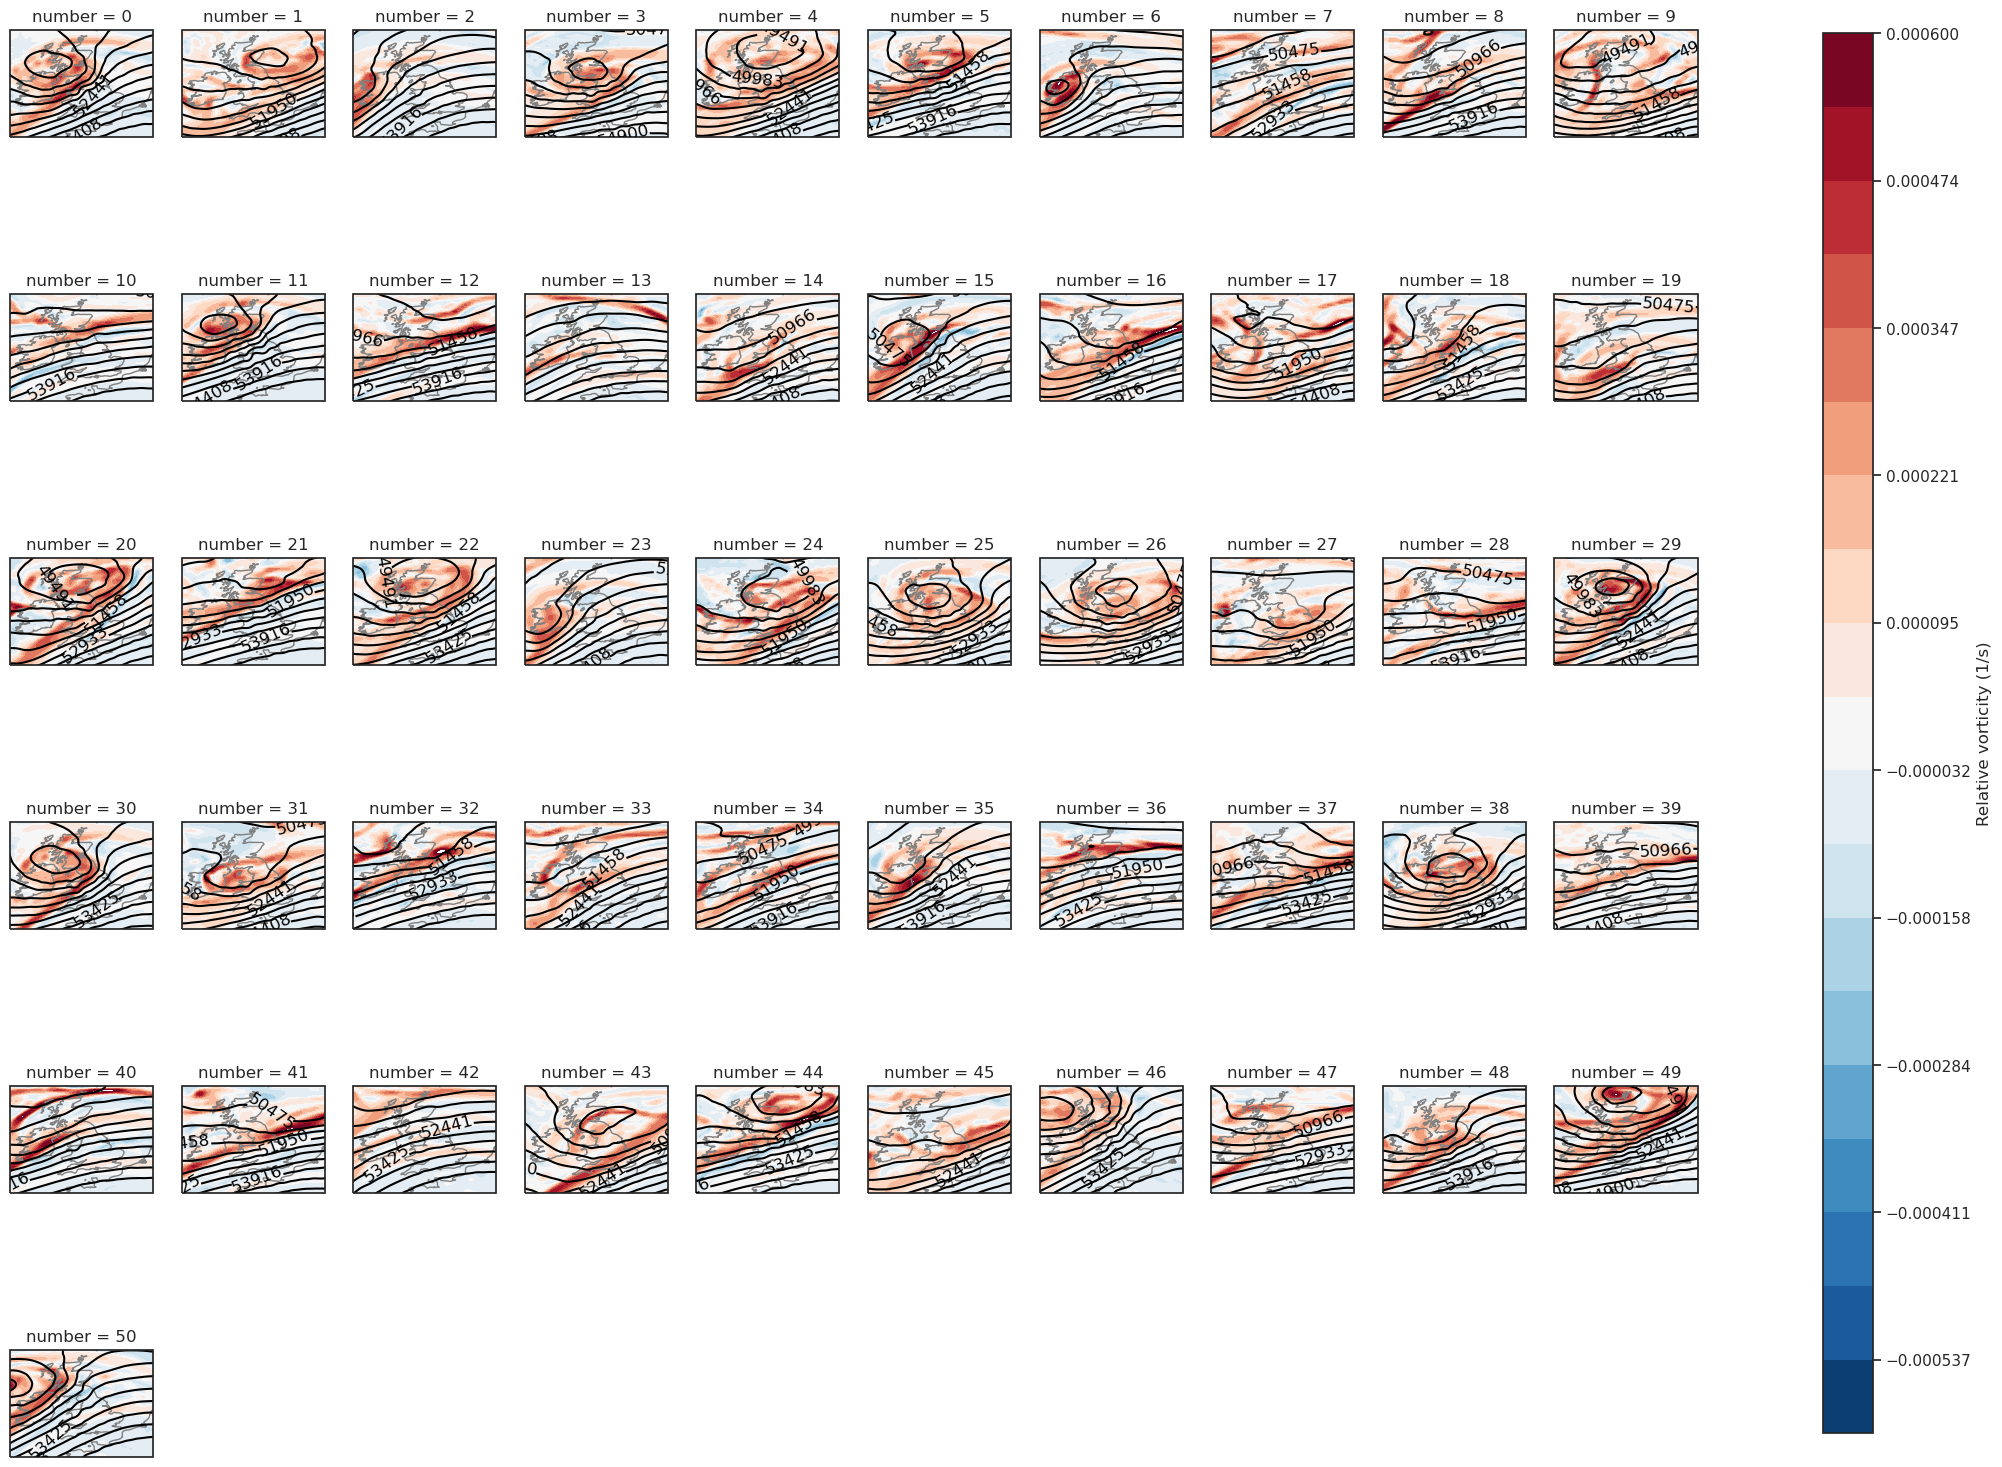

In [66]:
projection = ccrs.PlateCarree()

longitude = eps500['pi'].longitude.values
latitude = eps500['pi'].latitude.values
N = 51

for experiment in experiments:
    for member in range(N):

        vo_vals = eps500[experiment].sel(time='2022-02-18 12',
                                        level=500, number=member).vo
        gph_vals = eps500[experiment].sel(time='2022-02-18 12',
                                        level=500, number=member).z

        # figure and map setup
        fig = plt.figure(1, figsize=(25, 15))
        ax = plt.subplot(int(N / 10)+1, 10, member + 1, projection=projection)
        ax.set_extent(uk, projection)
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color='grey')

        # vo as shading
        clevs_vo = np.linspace(vo_min, vo_max, 20)
        cf = ax.contourf(longitude, latitude, vo_vals, clevs_vo, cmap=plt.cm.RdBu_r,
                        transform=projection)

        #gph as contours
        clevs_gph = np.linspace(gph_min, gph_max, 13)
        cs = ax.contour(longitude, latitude, gph_vals, clevs_gph, colors='black',
                        transform=projection)
        plt.clabel(cs, fmt='%d')
        ax.set_title("number = "+str(member))

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
    fig.colorbar(cf, cax=cbar_ax, label='Relative vorticity (1/s)')
    plt.show()